<center> <h1>Data Wrangling Project</h1>
<h4> Data Analysis Nanodegree (Udacity)</h4><br><hr></center>

- [Project Requirements](#req)
- [Gather](#gather)
- [Assess](#assess)
- [Clean](#clean)
- [Storing, Analyzing, and Visualizing](#extra)
<hr>

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id="req"></a>
## Project Requirements - Data Wrangling

The first step is to wrangle the provided dataset using the three-steps approach:

### Gather
- `twitter-archive-enhanced.csv` provided dataset containing tweets from WeRateDogs twitter account
- `image-predictions.tsv` is a dataset with dogs breed inference based on tweet's pictures, to be retrieved using python package `Requests`
- using `Tweepy` API to retrieve information from Twitter for each tweet based on its tweet ID. Save all tweets JSON to a `tweet_json.txt` file (each tweet per row)

### Assess

To perform a visually and programatic assessment of the data looking for quality and tidiness issues, **detect and document at least 8 quality issues and 2 tidiness issue**.

### Clean

To perform cleaning according to the findings from `Assess` phase.


## Further Requirements
### Key Points

Key points to keep in mind when data wrangling for this project:

- You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.

### Storing, Analyzing, and Visualizing Data for this Project

Store the clean DataFrame(s) in a CSV file with the main one named `twitter_archive_master.csv`. If additional files exist because multiple tables are required for tidiness, name these files appropriately. *Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do)*.

Analyze and visualize your wrangled data here. **At least three (3) insights and one (1) visualization must be produced**.

<hr>
<a id="gather"></a>
# Gather

`twitter-archive-enhanced.csv`

In [287]:
df_twitter = pd.read_csv('twitter-archive-enhanced.csv')

`image-predictions.tsv`

In [288]:
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

r = requests.get(url)

if (r.status_code == 200):
    with open("image-predictions.tsv", "w") as file:
        file.write(r.text)
    
    # This is a TSV file
    df_img_pred = pd.read_csv('image-predictions.tsv', delimiter='\t')
else:
    print('[!] The URL is not accessible, file not gathered!')


`tweet_json.txt`

<font color="red">**[!] Clean the Twitter API keys prior to submission**</font>

In [289]:
consumer_key = ""
consumer_secret = ""

In [290]:
import tweepy

# seth OAuth credentials to start API
auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)
api = tweepy.API(auth)

In [291]:
tweets = []

# retrieve extra data for each tweet from provided dataset
for tweet_id in df_twitter.tweet_id.unique():
    try:
        tweet_json = api.get_status(tweet_id)._json
        favorite_count = tweet_json['favorite_count']
        retweet_count = tweet_json['retweet_count']
        #retweeted = tweet_json['retweeted']
    except:
        print('[!] There is an issue with Tweet ID:', tweet_id)
        favorite_count = np.nan
        retweet_count = np.nan
        #retweeted = np.nan
        
    tweets.append([tweet_id, favorite_count, retweet_count])
    

[!] There is an issue with Tweet ID: 888202515573088257
[!] There is an issue with Tweet ID: 873697596434513921
[!] There is an issue with Tweet ID: 872668790621863937
[!] There is an issue with Tweet ID: 872261713294495745
[!] There is an issue with Tweet ID: 869988702071779329
[!] There is an issue with Tweet ID: 866816280283807744
[!] There is an issue with Tweet ID: 861769973181624320
[!] There is an issue with Tweet ID: 856602993587888130
[!] There is an issue with Tweet ID: 851953902622658560
[!] There is an issue with Tweet ID: 845459076796616705
[!] There is an issue with Tweet ID: 844704788403113984
[!] There is an issue with Tweet ID: 842892208864923648
[!] There is an issue with Tweet ID: 837366284874571778
[!] There is an issue with Tweet ID: 837012587749474308
[!] There is an issue with Tweet ID: 829374341691346946
[!] There is an issue with Tweet ID: 827228250799742977
[!] There is an issue with Tweet ID: 812747805718642688
[!] There is an issue with Tweet ID: 80224711149

In [292]:
# save API retrieved data as a new CSV file
df_tweets = pd.DataFrame(tweets, columns=['tweet_id', 'favorite_count', 'retweet_count'])
df_tweets.to_csv('tweets_json.csv', index=False)

<hr>
<a id="assess"></a>
# Assess

## Criteria

> ### Quality

> Checking for content issues (low quality data)

> - missing data
> - invalid data
> - innacturate data
> - inconsistent data

> ### Tidiness
> Checking for structural issues (untidy data)

> - each variable is a column
> - each observation is a row
> - each observational unit is a table

## Visual Assessment

In [293]:
pd.set_option('display.max_columns', 500)
df_twitter.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1467,694329668942569472,NaN,NaN,2016-02-02 01:21:07 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grady. He's very hungry. Too bad no one can find his food bowl. 9/10 poor pupper https://t.co/oToIkYnEGn,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694329668942569472/photo/1,9,10,Grady,None,None,pupper,None
2122,670403879788544000,NaN,NaN,2015-11-28 00:48:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Nigel. He accidentally popped his ball after dunking so hard the backboard shattered. 10/10 great great pup https://t.co/vSd1TWFK1I,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670403879788544000/photo/1,10,10,Nigel,None,None,None,None
1391,700143752053182464,NaN,NaN,2016-02-18 02:24:13 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When it's Janet from accounting's birthday but you can't eat the cake cuz it's chocolate. 10/10 hang in there pupper https://t.co/Fbdr5orUrJ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700143752053182464/photo/1,10,10,None,None,None,pupper,None
855,764857477905154048,NaN,NaN,2016-08-14 16:13:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Aubie. He has paws for days. Nibbling tables is one of his priorities. Second only to being cuddly af. 12/10 https://t.co/cBIFBsCRz6,NaN,NaN,NaN,https://twitter.com/dog_rates/status/764857477905154048/photo/1,12,10,Aubie,None,None,None,None
1561,688385280030670848,NaN,NaN,2016-01-16 15:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Louis. He's takes top-notch selfies. 12/10 would snapchat with https://t.co/vz2DukO0th,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/688385280030670848/photo/1,https://twitter.com/dog_rates/status/688385280030670848/photo/1,https://twitter.com/dog_rates/status/688385280030670848/photo/1,https://twitter.com/dog_rates/status/688385280030670848/photo/1",12,10,Louis,None,None,None,None


In [294]:
df_img_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
548,677334615166730240,https://pbs.twimg.com/media/CWZgPPUWUAAUOvu.jpg,2,Lakeland_terrier,0.859392,True,Airedale,0.067292,True,Irish_water_spaniel,0.049531,True
1098,720389942216527872,https://pbs.twimg.com/media/Cf9W1J-UMAErahM.jpg,1,Pembroke,0.873977,True,Cardigan,0.043339,True,Eskimo_dog,0.019197,True
970,706538006853918722,https://pbs.twimg.com/media/Cc4gjxqW4AIoThO.jpg,1,chow,0.541794,True,Pembroke,0.094918,True,Pomeranian,0.085439,True
613,680145970311643136,https://pbs.twimg.com/media/CXBdJxLUsAAWql2.jpg,1,miniature_poodle,0.457117,True,toy_poodle,0.226481,True,Maltese_dog,0.067682,True
498,675820929667219457,https://pbs.twimg.com/media/CWD_jQMWEAAdYwH.jpg,1,basset,0.556373,True,beagle,0.201675,True,bloodhound,0.110848,True


In [295]:
df_tweets.sample(5)

,tweet_id,favorite_count,retweet_count
313,835246439529840640,2098.0,73.0
1715,680221482581123072,NaN,NaN
2115,670428280563085312,NaN,NaN
1849,675781562965868544,NaN,NaN
2103,670676092097810432,NaN,NaN


<hr>
From **Visual Assessment** the following issues are identified:

> #### Quality

> **df_twitter** table (tweets):
>- NaN values for `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`, 
>- `timestamp`, `text` and `expanded_url` can have a better descriptive name
>- `source` containing all HTML `a` tag
>- `doggo` / `floffer` / `pupper` / `popper` - "None" as text
>- `name` with values such as `None` or `a`

> **df_img_pred** table (predictions from pictures):
>- the prediction columns can have a better descriptive name than `p1`, `p1_conf`, `p1_dog` or `jpg_url`

> **df_tweets** table (extra data obtained through API)
> - NaN values for `favorite_count` and `retweet_count`

> #### Tidiness
>**df_twitter** table (tweets):
> - `doggo` / `floffer` / `pupper` / `popper` (all can be in just one column `dogtionary` or `dog_stage`)
> - once this table relates to **tweets** information about `in_reply` or `retweet` can be moved to another table (different observation units)
> - `rating_numerator` and `rating_denominator` can be converted to a single column `rating`

>**df_img_pred** table (predictions from pictures):
>- None

> **df_tweets** table (extra data obtained through API)
> - None

> **Once it all relates to tweets, these three tables can be on the same table (tidiness, same observational unit)**

## Programmatic Assessment

In [296]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [297]:
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [298]:
df_twitter['rating_denominator'].value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [299]:
df_twitter['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [300]:
sum(df_twitter['tweet_id'].duplicated())

0

In [301]:
df_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [302]:
df_img_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [303]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id          2356 non-null int64
favorite_count    878 non-null float64
retweet_count     878 non-null float64
dtypes: float64(2), int64(1)
memory usage: 55.3 KB


In [304]:
df_twitter['name'][~df_twitter['name'].str.istitle()].value_counts()

a               55
the             8 
an              7 
very            5 
just            4 
quite           4 
one             4 
not             2 
getting         2 
actually        2 
CeCe            2 
mad             2 
JD              1 
space           1 
infuriating     1 
old             1 
my              1 
by              1 
incredibly      1 
BeBe            1 
light           1 
DonDon          1 
his             1 
such            1 
all             1 
life            1 
DayZ            1 
unacceptable    1 
this            1 
officially      1 
Name: name, dtype: int64

In [305]:
df_twitter.expanded_urls.str[:37].value_counts()

https://twitter.com/dog_rates/status/    2099
http://us.blastingnews.com/news/2017/    3   
http://www.gofundme.com/bluethewhiteh    2   
https://www.petfinder.com/petdetail/3    2   
https://www.gofundme.com/help-my-baby    2   
https://www.gofundme.com/3yd6y1c,http    2   
https://www.gofundme.com/my-puppys-do    2   
https://www.gofundme.com/help-lorenzo    2   
https://twitter.com/dogratingrating/s    2   
https://vine.co/v/ea0OwvPTx9l            2   
https://www.gofundme.com/surgeryforja    2   
https://www.gofundme.com/3ti3nps,http    2   
https://www.gofundme.com/3hgsuu0,http    2   
https://www.gofundme.com/lolas-life-s    2   
https://www.loveyourmelon.com/pages/o    2   
https://www.gofundme.com/helpquinny,h    2   
https://www.gofundme.com/servicedogol    2   
https://vine.co/v/iDWlapaXWmm            1   
https://vine.co/v/hQJbaj1VpIz            1   
https://vine.co/v/iwAjdlEjwMl            1   
https://vine.co/v/hUvHKYrdb1d            1   
https://vine.co/v/in7ZzHPKzWz     

<hr>
From **Programmatic Assessment** the following issues are identified:

> #### Quality
> **df_twitter** table (tweets):
>- `timestamp` and `retweeted_status_timestamp` not in date format
>- `rating_denominator` it is normally **10**, there are unusual values
>- `rating_numerator` it is normmally **little above 10**, but there values less than 10 or really higher
>- from the **2355** entries, many of the columns have empty values those derived from `retweeted` (just 181 non-empty), those derived from `in_reply` (78 non-empty), those derived from Twitter API and those from picture inference (2075 non-empty)
>- wrong `name` such as **a**, **an**, **the**, **this**
>- `expanded_urls` with multiple values


> #### Tidiness
> Regarding the last point above and the **visual assessment**, retweeted and in_reply cases must be removed from the tweets dataset once this is a data analysis of tweets and not retweets


<hr>
<a id="clean"></a>

# Clean

> Perform the Clean step of Data Wrangling using the process
> 1. Define
> 2. Code
> 3. Test

*Note: According to review process from Udacity, it is expected to **inner** join all sets, so the tidiness will be addressed first once this will reduce the cases of missing data (the first issue to be addressed according to classes)*

### Create copies for cleaning

In [306]:
# Create copies for cleaning
df_twitter_clean = df_twitter.copy()
df_img_pred_clean = df_img_pred.copy()
df_tweets_clean = df_tweets.copy()

### Define (Tidiness Issues)

1. Once it all relates to tweets, these three tables can be on the same table (tidiness, same observational unit)
2. remove tweets that are from `in_reply` and `retweeted` *(retweets an replies are out of scope)*
3. convert `doggo` / `floffer` / `pupper` / `popper` columns to a single column `dog_stage`


### Code (Tidiness Issues)

##### #1

In [307]:
df = df_twitter_clean.merge(df_tweets_clean, on='tweet_id').merge(df_img_pred_clean, on='tweet_id')

##### #2

In [308]:
# mask to keep just tweets without in_reply and retweeted
mask = df.in_reply_to_status_id.isnull() & df.in_reply_to_user_id.isnull() & \
    df.retweeted_status_id.isnull() & df.retweeted_status_user_id.isnull() \
    & df.retweeted_status_timestamp.isnull()

In [309]:
# applying mask to retrieve just tweets without in_reply and retweeted
df = df[mask]
df.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 
                                  'retweeted_status_id', 'retweeted_status_user_id',
                                 'retweeted_status_timestamp'], axis=1, inplace=True)

##### #3

In [310]:
# keep just one column dog_stage instead of four (doggo, floofer, pupper, puppo)

df["dog_stage"] = (df['doggo'] + df['floofer'] + \
                                    df['pupper'] + \
                                    df['puppo']).replace(to_replace=r"(None)", value='', regex=True)

df.drop(columns=["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

### Test (Tidiness Issues)

##### #1

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 22 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
favorite_count        651 non-null float64
retweet_count         651 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bo

*Note: There are multiple Empty values for the data obtained though API (`favorite_count`, `retweet_count`). It is chosen to keep than to do not reduce the dataset too much (from actual 1971 to 702).*

##### #2

According to `df.info()` above there are no columns related to `in_reply` or `retweeted`

##### #3

In [312]:
df['dog_stage'].value_counts()

                1668
pupper          201 
doggo           63  
puppo           22  
doggopupper     8   
floofer         7   
doggopuppo      1   
doggofloofer    1   
Name: dog_stage, dtype: int64

**The above misclassifications (doggopupper, doggopuppo, doggofloofer) will be reassessed as a Quality issue below**

### Define (Quality Issue #1)


> - doggo` / `floffer` / `pupper` / `popper` - "" as text 
> - misclassifications such as `doggopupper`, `doggopuppo`, `doggofloofer`



### Code (Quality Issue #1)

In [313]:
# The None was removed on previous step of Tidiness in this part the "" is replaced by NaN
df["dog_stage"].replace(to_replace="", value=np.nan, inplace=True)

In [314]:
# From reinspecting text or by seeing the tweet picture for wrong types to infer
df.loc[df["tweet_id"] == 855851453814013952, "dog_stage"] = "puppo"
df.loc[df["tweet_id"] == 854010172552949760, "dog_stage"] = "floofer"
df.loc[df["tweet_id"] == 817777686764523521, "dog_stage"] = "pupper"
df.loc[df["tweet_id"] == 808106460588765185, "dog_stage"] = "" # both in the same picture
df.loc[df["tweet_id"] == 801115127852503040, "dog_stage"] = "pupper"
df.loc[df["tweet_id"] == 785639753186217984, "dog_stage"] = "doggo" # not a dog
df.loc[df["tweet_id"] == 759793422261743616, "dog_stage"] = "" # both in the same picture
df.loc[df["tweet_id"] == 751583847268179968, "dog_stage"] = "doggo"
df.loc[df["tweet_id"] == 741067306818797568, "dog_stage"] = "" # both in the same picture
df.loc[df["tweet_id"] == 733109485275860992, "dog_stage"] = "pupper"

### Test (Quality Issue #1)

In [315]:
df["dog_stage"].value_counts()

pupper     204
doggo      65 
puppo      23 
floofer    8  
           3  
Name: dog_stage, dtype: int64

### Define (Quality Issue #2)


>`timestamp` not in date format



### Code (Quality Issue #2)

In [316]:
# converting timestamp to datetime format
df["timestamp"] = pd.to_datetime(df.timestamp)

### Test (Quality Issue #2)

In [317]:
print(df["timestamp"].dtype)

datetime64[ns]


### Define (Quality Issue #3 and #4)


>1. `rating_denominator` it is normally **10**, there are unusual values
>2. `rating_numerator` it is normmally **little above 10**, but there values less than 10 or really higher
>
> For issue **#3** and **#4** the columns `rating_numerator` and `rating_denominator` are retrieved again from with a new regex that allows to retrieve the following examples:

>- 9/10 => [9, 10]
>- 9.75/10 => [9.75, 10]
>- 11.12/11.15 => [11.12, 11.15]



### Code (Quality Issue #3 and #4)

In [318]:
df[['rating_numerator', 'rating_denominator']] = df.text.str.extract('((?:\d+\.)?\d+)\/((?:\d+\.)?\d+)', 
                                                                     expand=True)

# Once it return as string, let`s convert them to numeric
df['rating_denominator'] =  pd.to_numeric(df['rating_denominator'])
df['rating_numerator'] =  pd.to_numeric(df['rating_numerator'])

### Test (Quality Issue #3 and #4)

In [319]:
df.loc[df['rating_denominator'] != 10, ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
346,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70
416,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7
736,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150
878,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11
926,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170
969,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20
1003,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50
1024,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90
1049,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80
1067,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50


In [320]:
df.loc[df['rating_numerator'] < 10, ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
186,848212111729840128,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",6.00,10
250,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0.00,10
559,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10
589,781661882474196992,Who keeps sending in pictures without dogs in them? This needs to stop. 5/10 for the mediocre road https://t.co/ELqelxWMrC,5.00,10
616,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3.00,10
660,771014301343748096,Another pic without a dog in it? What am I supposed to do? Rate the carpet? Fine I will. 7/10 looks adequately comfy https://t.co/OJZQ6I4gGd,7.00,10
677,768193404517830656,Meet Gerald. He's a fairly exotic doggo. Floofy af. Inadequate knees tho. Self conscious about large forehead. 8/10 https://t.co/WmczvjCWJq,8.00,10
685,766423258543644672,This is Shadoe. Her tongue flies out of her mouth at random. Can't have a serious conversation with her. 9/10 https://t.co/Tytt15VquG,9.00,10
698,763183847194451968,This is Clark. He collects teddy bears. It's absolutely h*ckin horrifying. 8/10 please stop this Clark https://t.co/EDMcwt86fU,8.00,10
720,760252756032651264,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4.00,10


### Code step #2 (Quality Issue #3 and #4)

Inspecting the text of tweets with wrong denominator, follows the ones that are really wrong and after inspection, follow:

In [321]:
df.loc[df.tweet_id == 740373189193256964, ['rating_numerator', 'rating_denominator']] = 14, 10
df.loc[df.tweet_id == 722974582966214656, ['rating_numerator', 'rating_denominator']] = 13, 10
df.loc[df.tweet_id == 716439118184652801, ['rating_numerator', 'rating_denominator']] = 11, 10
df.loc[df.tweet_id == 682962037429899265, ['rating_numerator', 'rating_denominator']] = 10, 10
df.loc[df.tweet_id == 666287406224695296, ['rating_numerator', 'rating_denominator']] = 9, 10

# from tweet comments
df.loc[df.tweet_id == 810984652412424192, ['rating_numerator', 'rating_denominator']] = 11, 10

### Test step #2 (Quality Issue #3 and #4)

In [322]:
df.loc[df['rating_numerator'] > 14, ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
346,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70
736,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165.0,150
804,749981277374128128,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776.0,10
926,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204.0,170
1024,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90
1049,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80
1067,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50
1133,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50
1209,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40
1382,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110


### Define (Quality Issue #5)
> `source` containing all HTML a tag, instead of just the attribute

### Code (Quality Issue #5)

In [323]:
df["source"] = df["source"].replace(to_replace=r".+\">(.+)<\/a>", value=r'\1', regex=True)

### Test (Quality Issue #5)

In [324]:
df["source"].value_counts()

Twitter for iPhone    1932
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

### Define (Quality Issue #6)

> `timestamp`, `text`, `expanded_url`, `jpg_url` and the prediction columns can have a better descriptive name
>
> **Important note:** *Many of the previous identified quality issues (**assess phase**) were related with `in_reply_*` and `retweeted_*` fields, with the tidiness step to keep just tweets these fields were removed then these quality issues were fixed.*

### Code (Quality Issue #6)

In [325]:
df.rename(columns={"text" : "tweet_text", 
                         "timestamp" : "tweet_post_timestamp",
                         "expanded_urls" : "tweet_url"}, inplace=True)

In [326]:
df.rename(columns={"jpg_url" : "image_url", \
    "p1" : "prediction1", \
    "p1_conf" : "prediction1_confidence", \
    "p1_dog" : "prediction1_is_dog", \
    "p2" : "prediction2", \
    "p2_conf" : "prediction2_confidence", \
    "p2_dog" : "prediction2_is_dog", \
    "p3" : "prediction3", \
    "p3_conf" : "prediction3_confidence", \
    "p3_dog" : "prediction3_is_dog"}, inplace=True)

### Test (Quality Issues #6)

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 22 columns):
tweet_id                  1971 non-null int64
tweet_post_timestamp      1971 non-null datetime64[ns]
source                    1971 non-null object
tweet_text                1971 non-null object
tweet_url                 1971 non-null object
rating_numerator          1971 non-null float64
rating_denominator        1971 non-null int64
name                      1971 non-null object
favorite_count            651 non-null float64
retweet_count             651 non-null float64
image_url                 1971 non-null object
img_num                   1971 non-null int64
prediction1               1971 non-null object
prediction1_confidence    1971 non-null float64
prediction1_is_dog        1971 non-null bool
prediction2               1971 non-null object
prediction2_confidence    1971 non-null float64
prediction2_is_dog        1971 non-null bool
prediction3               1971 non-null obj

### Define (Quality Issue #7)
> There are dogs with wrong `name`s
>
> Through tweet inspection, let's fix them

### Code (Quality Issue #7)

In [328]:
pd.set_option('display.max_rows', 120)
df.loc[~df['name'].str.istitle(), ["tweet_id", "tweet_text", "name"]]

,tweet_id,tweet_text,name
22,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
51,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
142,859196978902773760,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
156,855459453768019968,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
294,828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
439,806219024703037440,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
525,792913359805018113,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a
528,792394556390137856,Meet BeBe. She rocks the messy bun of your dreams. H*ckin flawless. 12/10 would watch her tutorial https://t.co/of0pFNBIl8,BeBe
648,772581559778025472,Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn,a
664,770655142660169732,We only rate dogs. Pls stop sending in non-canines like this Arctic Floof Kangaroo. This is very frustrating. 11/10 https://t.co/qlUDuPoE3d,very


Fixing those with the name available in the `tweet_text`:

In [329]:
df.loc[~df['name'].str.istitle(), "name"] = "None"
df.loc[df.tweet_id == 828650029636317000, 'name'] = "Grace"
df.loc[df.tweet_id == 792394556390137000, 'name'] = "BeBe"
df.loc[df.tweet_id == 769212283578875000, 'name'] = "DonDon"
df.loc[df.tweet_id == 765395769549590000, 'name'] = "Zoey"
df.loc[df.tweet_id == 748692773788876000, 'name'] = "Quizno"
df.loc[df.tweet_id == 698953797952008000, 'name'] = "CeCe"
df.loc[df.tweet_id == 680221482581123000, 'name'] = "CeCe"
df.loc[df.tweet_id == 675706639471788000, 'name'] = "Wylie"
df.loc[df.tweet_id == 673636718965334000, 'name'] = "Kip"
df.loc[df.tweet_id == 671743150407421000, 'name'] = "Jacob"
df.loc[df.tweet_id == 671542985629241000, 'name'] = "JD"
df.loc[df.tweet_id == 671147085991960000, 'name'] = "Rufus"
df.loc[df.tweet_id == 670427002554466000, 'name'] = "Spork"
df.loc[df.tweet_id == 670361874861563000, 'name'] = "Cherokee"
df.loc[df.tweet_id == 670303360680108000, 'name'] = "Hemry"
df.loc[df.tweet_id == 669923323644657000, 'name'] = "Alphred"
df.loc[df.tweet_id == 669564461267722000, 'name'] = "Alfredo"
df.loc[df.tweet_id == 668955713004314000, 'name'] = "Leroi"
df.loc[df.tweet_id == 668636665813057000, 'name'] = "Berta"
df.loc[df.tweet_id == 668507509523615000, 'name'] = "Chuk"
df.loc[df.tweet_id == 668480044826800000, 'name'] = "DayZ"
df.loc[df.tweet_id == 668171859951755000, 'name'] = "Alfonso"
df.loc[df.tweet_id == 667861340749471000, 'name'] = "Cheryl"
df.loc[df.tweet_id == 667773195014021000, 'name'] = "Jessiga"
df.loc[df.tweet_id == 667538891197542000, 'name'] = "Klint"
df.loc[df.tweet_id == 667470559035432000, 'name'] = "Kohl"
df.loc[df.tweet_id == 667177989038297000, 'name'] = "Daryl"
df.loc[df.tweet_id == 666983947667116000, 'name'] = "Pepe"
df.loc[df.tweet_id == 666781792255496000, 'name'] = "Octaviath"
df.loc[df.tweet_id == 666701168228331000, 'name'] = "Johm"

### Test (Quality Issues #7)

In [330]:
df['name'][~df['name'].str.istitle()].value_counts()

Series([], Name: name, dtype: int64)

### Define (Quality Issue #8)

> - Multiple values for `expanded_urls` now `tweet_url`

### Code (Quality Issue #8)

> - Keep just one occurrence of the URL

In [331]:
df["tweet_url"] = df["tweet_url"].replace(to_replace="(.*?,?)(https:\/\/twitter\.com/dog\_rates\/status\/\d+/(photo|video)/1$)(,?.*?)", 
                        value=r"\2", regex=True)

### Test (Quality Issues #7)

In [332]:
df.tweet_url.str[:37].value_counts()

https://twitter.com/dog_rates/status/    1971
Name: tweet_url, dtype: int64

<hr>
<a id="extra"></a>
# Storing, Analyzing, and Visualizing

## Storing
- Store the `df` as CSV files
- Store a version of `df` as a SQL file

In [333]:
df.to_csv('twitter_archive_master.csv', index=False)

In [334]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///tweets.db')
df.to_sql('master', engine, index=False)

In [335]:
pd.read_sql('SELECT * FROM master', engine).head()

,tweet_id,tweet_post_timestamp,source,tweet_text,tweet_url,rating_numerator,rating_denominator,name,favorite_count,retweet_count,image_url,img_num,prediction1,prediction1_confidence,prediction1_is_dog,prediction2,prediction2_confidence,prediction2_is_dog,prediction3,prediction3_confidence,prediction3_is_dog,dog_stage
0,892420643555336193,2017-08-01 16:23:56.000000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,36054.0,7675.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,0,bagel,0.085851,0,banana,0.076110,0,None
1,892177421306343426,2017-08-01 00:17:27.000000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,31097.0,5674.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,1,Pekinese,0.090647,1,papillon,0.068957,1,None
2,891815181378084864,2017-07-31 00:18:03.000000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,23403.0,3763.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,1,malamute,0.078253,1,kelpie,0.031379,1,None
3,891689557279858688,2017-07-30 15:58:51.000000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,39324.0,7848.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,0,Labrador_retriever,0.168086,1,spatula,0.040836,0,None
4,891327558926688256,2017-07-29 16:00:24.000000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",https://twitter.com/dog_rates/status/891327558926688256/photo/1,12.0,10,Franklin,37560.0,8445.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,1,English_springer,0.225770,1,German_short-haired_pointer,0.175219,1,None


## Analyzing and Visualizing

<font color="red">According to requirements, at least three (3) insights and one (1) visualization must be produced</font>

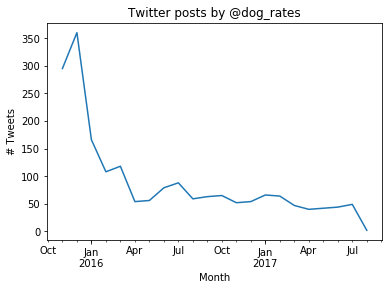

In [336]:
# tweets per month/year by WeRateDogs
df.set_index('tweet_post_timestamp').resample('MS').size().plot()
plt.xlabel('Month')
plt.ylabel('# Tweets')
plt.title('Twitter posts by @dog_rates');

### Most predicted dogs

In [337]:
# Evaluating the 10 most predicted dogs
df[df.prediction1_is_dog == True]['prediction1'].value_counts().nlargest(5)

golden_retriever      137
Labrador_retriever    94 
Pembroke              88 
Chihuahua             78 
pug                   54 
Name: prediction1, dtype: int64

### Most predicted non-dogs

In [338]:
# Evaluating the 10 most predicted as non dogs (what is it ?)
df[df.prediction1_is_dog == False]['prediction1'].value_counts().nlargest(5)

seat_belt      21
teddy          17
web_site       14
tennis_ball    8 
dingo          8 
Name: prediction1, dtype: int64

### Breeds with more favorites and retweet counts

In [339]:
dogs_success = df[df.prediction1_is_dog == True][['prediction1', 'favorite_count', 'retweet_count']]
dogs_success = dogs_success.groupby('prediction1').agg(sum)
dogs_success.sort_values(by=['favorite_count', 'retweet_count'], ascending=False).head(5)

,favorite_count,retweet_count
prediction1,,
golden_retriever,1183885.0,307686.0
Pembroke,707738.0,171095.0
Labrador_retriever,577015.0,139963.0
Chihuahua,471639.0,136705.0
French_bulldog,405498.0,97778.0


### Descriptive Statistics of Rating

In [340]:
df[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,1971.000000,1971.000000
mean,12.165287,10.456621
std,41.596384,6.788653
min,0.000000,10.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


### Dog Stage distribution

In [341]:
df['dog_stage'].value_counts().nlargest(3)

pupper    204
doggo     65 
puppo     23 
Name: dog_stage, dtype: int64

# Insights and Discussion
- According with the provided dataset the @WeRateDogs account on Twitter reduced its post in comparison with last months from 2015 and kept an average of 50 posts per month in 2016.

- Considering the predictor used to categorize the posts, the top 5 dogs (most posted) are:

<table border=1>  
    <tr>
        <td align="center" >#1 Golden Retriever
            <img src="https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg" style="width: 200px;" />
        </td>
        <td align="center" >#2 Labrador Retriever
            <img src="https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg" style="width: 200px;" />
        </td>
        <td>#3 Pembroke<img src="https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg" style="width: 200px;" /></td>
    </tr>
    <tr>
        <td align="center" >#4 Chihuahua
        <img src="https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg" style="width: 200px;" /></td>    
        <td align="center" >#5 Pug
        <img src="https://pbs.twimg.com/media/C8576jrW0AEYWFy.jpg" style="width: 200px;" /></td>
        <td align="center" >&nbsp;</td>
    </tr>
</table>

- The top 5 wrong predictions (greater number of occurences) for those that the predictor do not predicted as a dog are:

<table border=1>  
    <tr>
        <td align="center" >#1 seat_belt (21 times)
            <img src="https://pbs.twimg.com/media/CXgHoLnWAAA8i52.jpg" style="width: 200px;" />
        </td>
        <td>#2 teddy (17 times)
            <img src="https://pbs.twimg.com/media/CugtKeXWEAAamDZ.jpg" style="width: 200px;" />
        </td>
        <td align="center" >#3 web_site (14 times)
            <img src="https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg" style="width: 200px;" />
        </td>
        
    </tr>
    <tr>
        <td align="center" >#4 tennis_ball (8 times)
        <img src="https://pbs.twimg.com/media/CVPeX2dWwAEwyaR.jpg" style="width: 200px;" /></td>    
        <td align="center" >#5 dingo (8 times)
        <img src="https://pbs.twimg.com/media/CU8ceuxWUAALMEo.jpg" style="width: 200px;" /></td>
        <td align="center" >&nbsp;</td>
    </tr>
</table>

- And finally, the top 5 most successful dogs (those with more retweets and favorites) are:
> 1. Golden Retriever
> 2. Labrador Retriever
> 3. Pembroke
> 4. Chihuahua
> 5. French bulldog
>
> It is required to evaluate these rates according to the number of posts to confirm if those breeds are the most successful!

- Regarding the ratings of the dogs
> - The mean rating is 12 over 10 (12/10)
> - the most occurrence are **puppers** (204)